<a href="https://colab.research.google.com/github/celdredge/udacity_education_capstone_project/blob/main/Education_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Education Capstone Project

What university-level factors predict the presence of a strong graduation rate? (Answerable with the College Scorecard)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
! gdown --id 1zw3ldL6MxgbZwu1m5mQiC5x3RRV2QvBe

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1zw3ldL6MxgbZwu1m5mQiC5x3RRV2QvBe
To: /content/Most-Recent-Cohorts-Institution.csv
100% 221M/221M [00:01<00:00, 137MB/s]


In [4]:
df = pd.read_csv('/content/Most-Recent-Cohorts-Institution.csv')  


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6,9,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664

In [5]:
df.shape

(6662, 2989)

In [6]:
print(df.columns.tolist())

['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'ACCREDAGENCY', 'INSTURL', 'NPCURL', 'SCH_DEG', 'HCM2', 'MAIN', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'CONTROL', 'ST_FIPS', 'REGION', 'LOCALE', 'LOCALE2', 'LATITUDE', 'LONGITUDE', 'CCBASIC', 'CCUGPROF', 'CCSIZSET', 'HBCU', 'PBI', 'ANNHI', 'TRIBAL', 'AANAPII', 'HSI', 'NANTI', 'MENONLY', 'WOMENONLY', 'RELAFFIL', 'ADM_RATE', 'ADM_RATE_ALL', 'SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'SATWR25', 'SATWR75', 'SATVRMID', 'SATMTMID', 'SATWRMID', 'ACTCM25', 'ACTCM75', 'ACTEN25', 'ACTEN75', 'ACTMT25', 'ACTMT75', 'ACTWR25', 'ACTWR75', 'ACTCMMID', 'ACTENMID', 'ACTMTMID', 'ACTWRMID', 'SAT_AVG', 'SAT_AVG_ALL', 'PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39', 'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45', 'PCIP46', 'PCIP47', 'PCIP48', 'PCI

In [7]:
df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE1_P8,MD_EARN_WNE_MALE1_P8,GT_THRESHOLD_P10,MD_EARN_WNE_INC1_P10,MD_EARN_WNE_INC2_P10,MD_EARN_WNE_INC3_P10,MD_EARN_WNE_INDEP1_P10,MD_EARN_WNE_INDEP0_P10,MD_EARN_WNE_MALE0_P10,MD_EARN_WNE_MALE1_P10
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,834.0,36639.0,0.6044,34076.0,35597.0,43145.0,40299.0,35424.0,36050.0,36377.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,1233.0,49652.0,0.7472,42254.0,49817.0,51571.0,48182.0,46435.0,42007.0,56164.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu/,www2.amridgeuniversity.edu:9091/,...,78.0,50355.0,0.6286,36636.0,44836.0,NaN,39040.0,NaN,32311.0,49599.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,891.0,57542.0,0.7769,49469.0,60533.0,57411.0,56884.0,53803.0,45170.0,66070.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,1077.0,32797.0,0.5178,30634.0,34533.0,38216.0,30602.0,32364.0,29836.0,35315.0


In [8]:
df = df[['INSTNM','C100_4','ADM_RATE_ALL','SAT_AVG','PCTFLOAN','UG25ABV','AVGFACSAL','TUITFTE','UGDS']]

In [9]:
# remove missing values
df = df.dropna()

In [10]:
df.shape

(1099, 9)

In [21]:
df.describe()

,C100_4,ADM_RATE_ALL,SAT_AVG,PCTFLOAN,UG25ABV,AVGFACSAL,TUITFTE,UGDS
count,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000
mean,0.445821,0.694906,1141.327571,0.517720,0.133085,8549.046406,13993.040946,6000.583258
std,0.203453,0.202094,130.901046,0.181692,0.117090,2645.514316,7879.455369,8396.029005
min,0.000000,0.050100,760.000000,0.000000,0.000300,1024.000000,0.000000,40.000000
25%,0.291950,0.597700,1052.000000,0.398600,0.041250,6775.000000,8171.500000,1246.000000
50%,0.428900,0.733800,1116.000000,0.522300,0.104800,8010.000000,12712.000000,2488.000000
75%,0.582850,0.835150,1207.000000,0.656200,0.193900,9928.500000,17494.000000,6707.500000
max,1.000000,1.000000,1566.000000,0.968600,0.657900,21143.000000,44117.000000,62633.000000


In [11]:
df.head(5)

,INSTNM,C100_4,ADM_RATE_ALL,SAT_AVG,PCTFLOAN,UG25ABV,AVGFACSAL,TUITFTE,UGDS
0,Alabama A & M University,0.1052,0.8965,959.0,0.7504,0.0383,7599.0,8101.0,5090.0
1,University of Alabama at Birmingham,0.3816,0.8060,1245.0,0.4688,0.1996,11380.0,11986.0,13549.0
3,University of Alabama in Huntsville,0.3109,0.7711,1300.0,0.3855,0.1543,9697.0,8279.0,7825.0
4,Alabama State University,0.1462,0.9888,938.0,0.7805,0.0691,7194.0,9302.0,3603.0
5,The University of Alabama,0.5230,0.8039,1262.0,0.3644,0.0828,10349.0,14705.0,30610.0


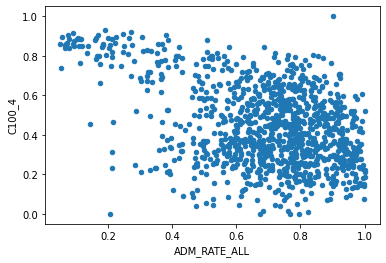

In [12]:
df.plot.scatter(x='ADM_RATE_ALL', y='C100_4');

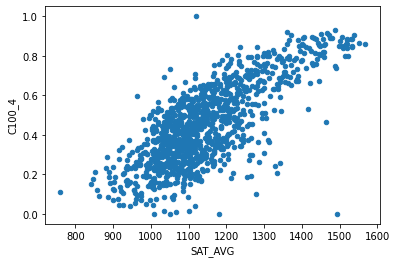

In [13]:
df.plot.scatter(x='SAT_AVG', y='C100_4');

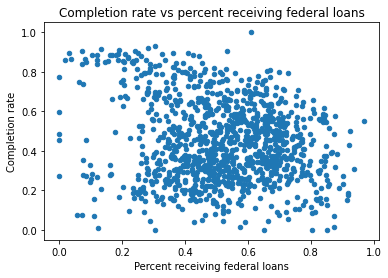

In [22]:
ax = df.plot.scatter(x='PCTFLOAN', y='C100_4', title='Completion rate vs percent receiving federal loans');
ax.set_xlabel("Percent receiving federal loans");
ax.set_ylabel("Completion rate");

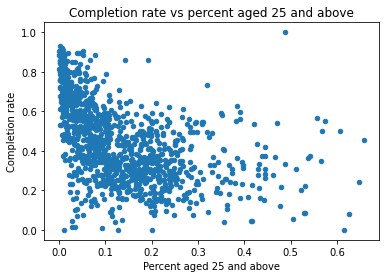

In [18]:
ax = df.plot.scatter(x='UG25ABV', y='C100_4', title='Completion rate vs percent aged 25 and above');
ax.set_xlabel("Percent aged 25 and above");
ax.set_ylabel("Completion rate");

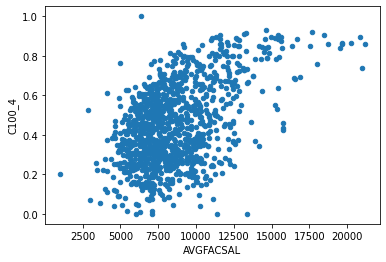

In [ ]:
df.plot.scatter(x='AVGFACSAL', y='C100_4');

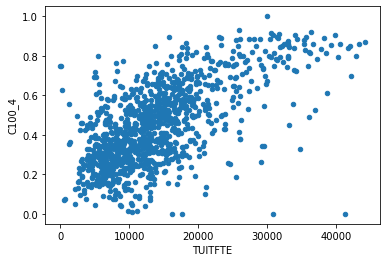

In [ ]:
df.plot.scatter(x='TUITFTE', y='C100_4');

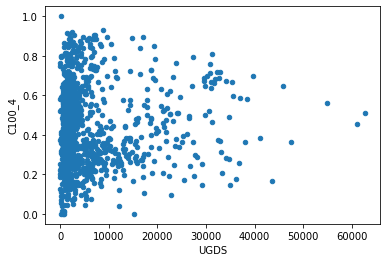

In [ ]:
df.plot.scatter(x='UGDS', y='C100_4');

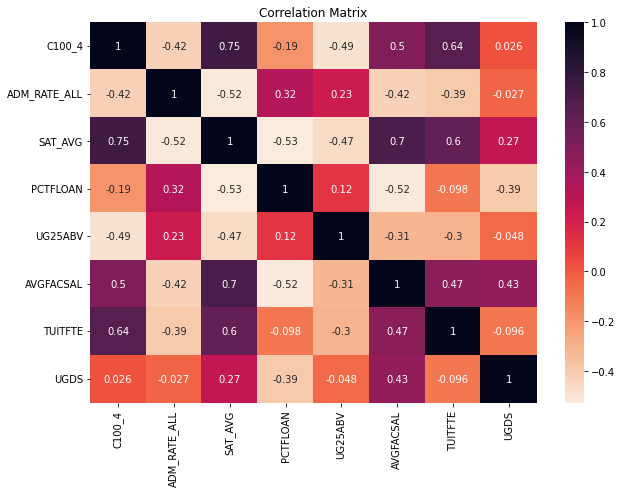

In [ ]:
cmap = sb.cm.rocket_r
plt.figure(figsize = [10, 7])
sb.heatmap(df.corr(),annot=True, cmap = cmap);
plt.title('Correlation Matrix');

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X = df[['C100_4','ADM_RATE_ALL','SAT_AVG','PCTFLOAN','UG25ABV','AVGFACSAL','TUITFTE','UGDS']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

# source https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

In [ ]:
vif_data

,feature,VIF
0,C100_4,15.199914
1,ADM_RATE_ALL,15.603504
2,SAT_AVG,66.762659
3,PCTFLOAN,11.214034
4,UG25ABV,2.865119
5,AVGFACSAL,28.815686
6,TUITFTE,8.460832
7,UGDS,2.271106


In [ ]:
X = df[['C100_4','PCTFLOAN','UG25ABV','TUITFTE','UGDS']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

# source https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

In [ ]:
vif_data

,feature,VIF
0,C100_4,9.180307
1,PCTFLOAN,5.236004
2,UG25ABV,2.358901
3,TUITFTE,7.154862
4,UGDS,1.490674


In [ ]:
# remove features that are correlated with each other
df = df[['C100_4','PCTFLOAN','UG25ABV','TUITFTE','UGDS']]

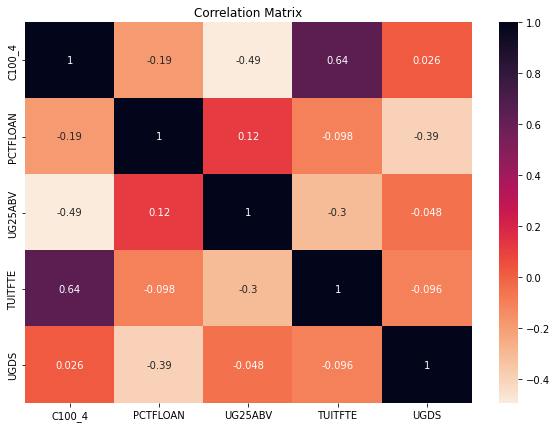

In [ ]:
cmap = sb.cm.rocket_r
plt.figure(figsize = [10, 7])
sb.heatmap(df.corr(),annot=True, cmap = cmap);
plt.title('Correlation Matrix');

In [ ]:
import statsmodels.api as sm
# C100_4 - Completion rate for first-time, full-time students at four-year institutions (100% of expected time to completion)
# PCTFLOAN - Percent of all undergraduate students receiving a federal student loan
# UG25ABV - Percentage of undergraduates aged 25 and above
# TUITFTE - Net tuition revenue per full-time equivalent student
# UGDS - Enrollment of undergraduate certificate/degree-seeking students

X = df[['PCTFLOAN','UG25ABV']] 
Y = df['C100_4']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

# source https://datatofish.com/statsmodels-linear-regression/

                            OLS Regression Results                            
Dep. Variable:                 C100_4   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     191.5
Date:                Tue, 21 Jun 2022   Prob (F-statistic):           4.82e-72
Time:                        23:23:08   Log-Likelihood:                 355.71
No. Observations:                1099   AIC:                            -705.4
Df Residuals:                    1096   BIC:                            -690.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6323      0.017     38.249      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


* const coefficient is the Y-intercept. It means that if both the PCTFLOAN and UG25ABV coefficients are zero, then the expected output (i.e., the Completion rate) would be equal to the const coefficient, 63%

* PCTFLOAN coefficient represents the change in the Completion rate due to a change of one unit in the percent of all undergraduate students receiving a federal student loan (everything else held constant). I.e. for every one percent increase in students receiving a federal loan, there was a -14.75% decrease in completion rate

* UG25ABV coefficient represents the change in the Completion rate due to a change of one unit in the percentage of undergraduates aged 25 and above (everything else held constant). I.e. for every one percent increase in undergraduates aged 25 and above, there was a -82.7% decrease in completion rate